In [6]:
import os, sys

# Add project root (one level up)
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

print("Using project root:", PROJECT_ROOT)


Using project root: /Users/krushna/Hodgkin-Huxley-Neuron-Model


In [7]:
pip install numpy pandas matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
# --- SETUP IMPORTS FROM PROJECT ---

import os, sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Add project root so Python can find the `src/` package
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

print("Project root added:", project_root)

# ---- Import your modules from src package ----
from src.gating import dm_dt, dh_dt, dn_dt, alpha_m, alpha_h, alpha_n, beta_m, beta_h, beta_n
from src.currents import I_Na, I_K, I_L
from src.parameters import Cm
from src.hh_model import hh_derivatives


Project root added: /Users/krushna/Hodgkin-Huxley-Neuron-Model


In [9]:
# ----- External injected current -----
def I_ext(t):
    # 10 µA/cm² current injection from 10–40 ms
    return 10.0 if 10 <= t <= 40 else 0.0


# ----- Initial conditions (based on steady state at V = -65mV) -----
V_rest = -65.0

def x_inf(alpha, beta, V):
    """Steady-state gating value."""
    return alpha(V) / (alpha(V) + beta(V))

m0 = x_inf(alpha_m, beta_m, V_rest)
h0 = x_inf(alpha_h, beta_h, V_rest)
n0 = x_inf(alpha_n, beta_n, V_rest)

y0 = [V_rest, m0, h0, n0]

print("Initial conditions (V, m, h, n):", y0)


# ----- Simulation time -----
t_start = 0.0
t_end   = 50.0
dt      = 0.01

t_eval = np.arange(t_start, t_end + dt, dt)


Initial conditions (V, m, h, n): [-65.0, 0.05293248525724958, 0.5961207535084603, 0.3176769140606974]


In [10]:
# Run HH system using your hh_derivatives() function
sol = solve_ivp(
    fun=lambda t, y: hh_derivatives(t, y, I_ext),
    t_span=(t_start, t_end),
    y0=y0,
    t_eval=t_eval,
    method="RK45",
    max_step=0.05
)

if not sol.success:
    print("ERROR:", sol.message)

t = sol.t
V = sol.y[0]
m = sol.y[1]
h = sol.y[2]
n = sol.y[3]

print("Simulation completed.")


Simulation completed.


In [11]:
INa = I_Na(V, m, h)
IK  = I_K(V, n)
IL  = I_L(V)


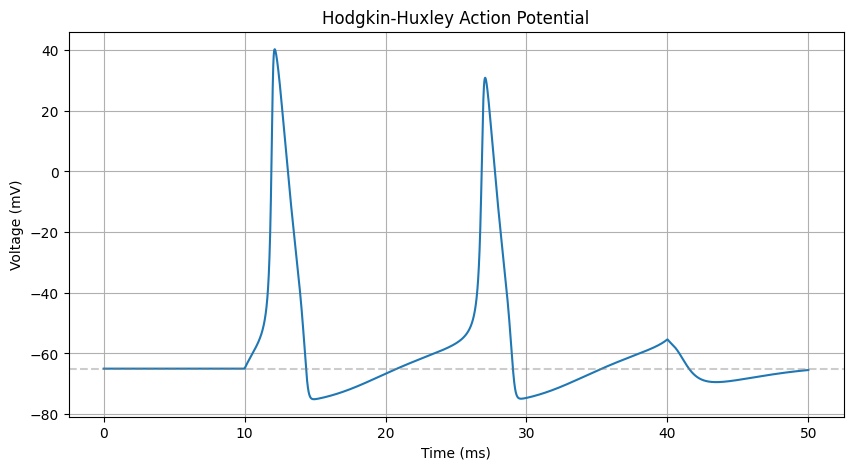

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(t, V, label="Membrane Voltage")
plt.axhline(-65, color="gray", linestyle="--", alpha=0.4)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.title("Hodgkin-Huxley Action Potential")
plt.grid(True)
plt.show()


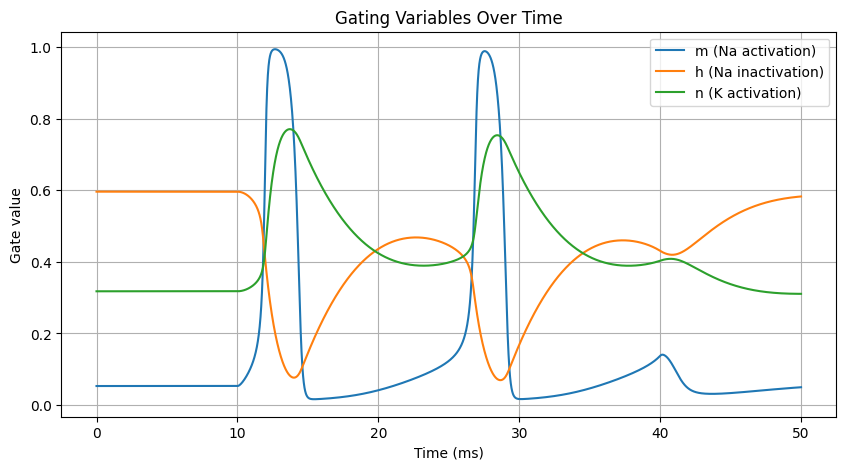

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(t, m, label='m (Na activation)')
plt.plot(t, h, label='h (Na inactivation)')
plt.plot(t, n, label='n (K activation)')
plt.xlabel("Time (ms)")
plt.ylabel("Gate value")
plt.title("Gating Variables Over Time")
plt.legend()
plt.grid(True)
plt.show()


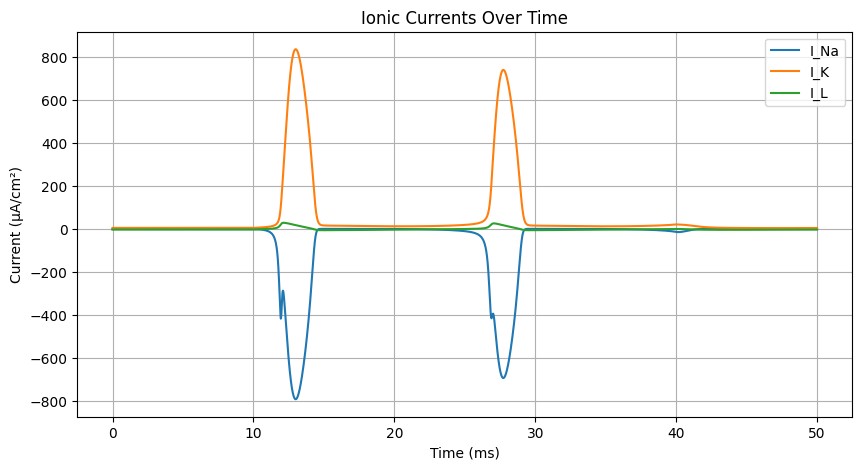

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(t, INa, label="I_Na")
plt.plot(t, IK, label="I_K")
plt.plot(t, IL, label="I_L")
plt.xlabel("Time (ms)")
plt.ylabel("Current (µA/cm²)")
plt.title("Ionic Currents Over Time")
plt.legend()
plt.grid(True)
plt.show()
